<a href="https://colab.research.google.com/github/Mahdi-Miri/FakeNewsDetector/blob/main/Fake_News.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [43]:
!pip install kagglehub numpy pandas scikit-learn nltk matplotlib
import nltk
import kagglehub
import pandas as pd
import os
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [44]:
dataset_path = kagglehub.dataset_download("hassanamin/textdb3")

print("Files in dataset:", os.listdir(dataset_path))

Files in dataset: ['fake_or_real_news.csv']


In [45]:
csv_file = [f for f in os.listdir(dataset_path) if f.endswith(".csv")][0]
csv_path = os.path.join(dataset_path, csv_file)

In [46]:
df = pd.read_csv(csv_path)

In [47]:
print(df.head())

   Unnamed: 0                                              title  \
0        8476                       You Can Smell Hillary’s Fear   
1       10294  Watch The Exact Moment Paul Ryan Committed Pol...   
2        3608        Kerry to go to Paris in gesture of sympathy   
3       10142  Bernie supporters on Twitter erupt in anger ag...   
4         875   The Battle of New York: Why This Primary Matters   

                                                text label  
0  Daniel Greenfield, a Shillman Journalism Fello...  FAKE  
1  Google Pinterest Digg Linkedin Reddit Stumbleu...  FAKE  
2  U.S. Secretary of State John F. Kerry said Mon...  REAL  
3  — Kaydee King (@KaydeeKing) November 9, 2016 T...  FAKE  
4  It's primary day in New York and front-runners...  REAL  


In [48]:
df.shape

(6335, 4)

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6335 entries, 0 to 6334
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  6335 non-null   int64 
 1   title       6335 non-null   object
 2   text        6335 non-null   object
 3   label       6335 non-null   object
dtypes: int64(1), object(3)
memory usage: 198.1+ KB


In [50]:
import pandas as pd
print(df.isna())
print(df.isna().sum())

      Unnamed: 0  title   text  label
0          False  False  False  False
1          False  False  False  False
2          False  False  False  False
3          False  False  False  False
4          False  False  False  False
...          ...    ...    ...    ...
6330       False  False  False  False
6331       False  False  False  False
6332       False  False  False  False
6333       False  False  False  False
6334       False  False  False  False

[6335 rows x 4 columns]
Unnamed: 0    0
title         0
text          0
label         0
dtype: int64


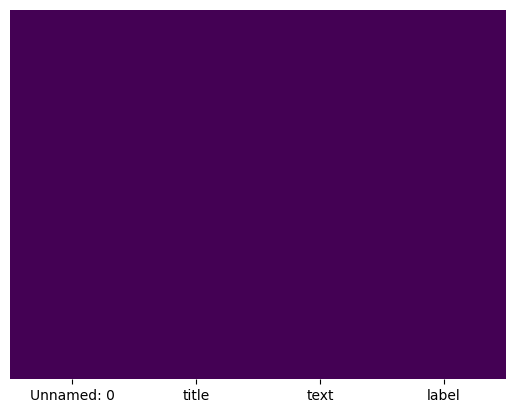

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(df.isna(), cmap="viridis", cbar=False, yticklabels=False)
plt.show()


In [52]:
print(df['label'].value_counts())

label
REAL    3171
FAKE    3164
Name: count, dtype: int64


In [53]:
df.columns.tolist()

['Unnamed: 0', 'title', 'text', 'label']

In [54]:
df = df.drop('Unnamed: 0', axis=1)

In [55]:
df.columns.tolist()

['title', 'text', 'label']

In [56]:
columns_to_check = ['title', 'text']

for column in columns_to_check:
    duplicate_rows = df[column].duplicated()
    if duplicate_rows.any():
        print(f"Duplicate values found in column '{column}'.")
        print(f"Number of duplicate values in column '{column}': {duplicate_rows.sum()}")

    else:
        print(f"No duplicate values found in column '{column}'.")

duplicate_all = df[df.duplicated(subset=['title','text'])]
if not duplicate_all.empty:
    print(f"Duplicate rows found in the combination of 'title' and 'text'.")
    print(duplicate_all)
else:
    print(f"No duplicate rows found in the combination of 'title' and 'text'.")


Duplicate values found in column 'title'.
Number of duplicate values in column 'title': 79
Duplicate values found in column 'text'.
Number of duplicate values in column 'text': 275
Duplicate rows found in the combination of 'title' and 'text'.
                                                  title  \
1492  University of Missouri, please immediately fir...   
1954  Loretta Lynch becomes first African-American w...   
2336  Obamacare Enrollees Anxiously Await Supreme Co...   
2856  Donald Trump is blatantly racist — and the med...   
2952       Black Agenda Report for Week of Oct 31, 2016   
3081    The College Loan Bombshell Hidden in the Budget   
3292  This astonishing chart shows how moderate Repu...   
3301                      OnPolitics | 's politics blog   
3324  Senate GOP prepared to replace Obamacare subsi...   
4140  We Republicans Lost On Gay Rights. That’s A Go...   
4405  Paintings 'almost no one else seemed to be doing'   
4885  An Open Letter to Black South African Poli

In [57]:
duplicated_titles = df[df['title'].duplicated(keep=False)]['title']

if not duplicated_titles.empty:
    print("Duplicate values in the 'title' column:")
    print(duplicated_titles.unique())
else:
    print("No duplicate values found in the 'title' column.")

Duplicate values in the 'title' column:
['Anti-Trump forces seek last-ditch delegate revolt'
 'Loretta Lynch becomes first African-American woman AG.'
 'Syrian War Report – November 2, 2016: ISIS and Al-Nusra Attempt to Cut Off Govt Supply Line to Aleppo'
 'The Fix Is In: NBC Affiliate Accidentally Posts Election Results A Week Early: Hillary Wins Presidency 42% to Trump’s 40%'
 'Do Democrats Want What Bernie Wants, Or Just What Bernie Has?'
 'US abstains from UN vote calling for end to Cuban embargo'
 'Get Ready For Civil Unrest: Survey Finds That Most Americans Are Concerned About Election Violence'
 'Meteor, space junk, rocket? Mysterious flash hits Siberia'
 'Hillary’s “Big Tent” is Obama’s “Grand Bargain” on Steroids'
 'Collusion Between Facebook and Hillary’s Campaign Revealed in Clinton Emails'
 'The Dark Agenda Behind Globalism And Open Borders'
 'Michael Moore Owes Me $4.99'
 'Guardian Front Page: “A 16-Year-Old Migrant Cries…”'
 "OnPolitics | 's politics blog"
 '18 State Swat

In [58]:
df_no_duplicates = df.drop_duplicates(subset=['title', 'text'])

print("DataFrame without duplicate rows:")
print(df_no_duplicates)

df = df.drop_duplicates(subset=['title'])

print("DataFrame without duplicate rows based on 'title' column:")
print(df)

df = df.drop_duplicates(subset=['text'])

print("DataFrame without duplicate rows based on 'text' column:")
print(df)

DataFrame without duplicate rows:
                                                  title  \
0                          You Can Smell Hillary’s Fear   
1     Watch The Exact Moment Paul Ryan Committed Pol...   
2           Kerry to go to Paris in gesture of sympathy   
3     Bernie supporters on Twitter erupt in anger ag...   
4      The Battle of New York: Why This Primary Matters   
...                                                 ...   
6330  State Department says it can't find emails fro...   
6331  The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...   
6332  Anti-Trump Protesters Are Tools of the Oligarc...   
6333  In Ethiopia, Obama seeks progress on peace, se...   
6334  Jeb Bush Is Suddenly Attacking Trump. Here's W...   

                                                   text label  
0     Daniel Greenfield, a Shillman Journalism Fello...  FAKE  
1     Google Pinterest Digg Linkedin Reddit Stumbleu...  FAKE  
2     U.S. Secretary of State John F. Kerry said Mon...  REAL  
3

In [59]:
import pandas as pd

null_label_count = df['label'].isnull().sum()
print(f"Number of null values in the 'label' column: {null_label_count}")

df = df.dropna(subset=['label'])

print("DataFrame after removing rows with null values in the 'label' column:")
print(df_cleaned)

Number of null values in the 'label' column: 0
DataFrame after removing rows with null values in the 'label' column:
                                                  title  \
0                          You Can Smell Hillary’s Fear   
1     Watch The Exact Moment Paul Ryan Committed Pol...   
2           Kerry to go to Paris in gesture of sympathy   
3     Bernie supporters on Twitter erupt in anger ag...   
4      The Battle of New York: Why This Primary Matters   
...                                                 ...   
6330  State Department says it can't find emails fro...   
6331  The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...   
6332  Anti-Trump Protesters Are Tools of the Oligarc...   
6333  In Ethiopia, Obama seeks progress on peace, se...   
6334  Jeb Bush Is Suddenly Attacking Trump. Here's W...   

                                                   text label  
0     Daniel Greenfield, a Shillman Journalism Fello...  FAKE  
1     Google Pinterest Digg Linkedin Reddit St

In [60]:
df.shape

(6011, 3)

In [61]:
df.head(20)

,title,text,label
0,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL
5,"Tehran, USA","\nI’m not an immigrant, but my grandparents ...",FAKE
6,Girl Horrified At What She Watches Boyfriend D...,"Share This Baylee Luciani (left), Screenshot o...",FAKE
7,‘Britain’s Schindler’ Dies at 106,A Czech stockbroker who saved more than 650 Je...,REAL
8,Fact check: Trump and Clinton at the 'commande...,Hillary Clinton and Donald Trump made some ina...,REAL
9,Iran reportedly makes new push for uranium con...,Iranian negotiators reportedly have made a las...,REAL
